Israel per square meter vs All other nations measured (growth or export per hectacher)

In [5]:
#Initial Data Cleaning
import pandas as pd

file_path = 'Agriculture_Data.csv'
df = pd.read_csv(file_path)
df_cleaned = df.drop_duplicates().dropna()
cleaned_file_path = r'C:\Users\Shmuel\Desktop\DI_Hackatons\DI_Hackathon_2\Cleaned_Agriculture_Data.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to C:\Users\Shmuel\Desktop\DI_Hackatons\DI_Hackathon_2\Cleaned_Agriculture_Data.csv


In [6]:
#Wheat Production 2018 Bar chart
import pandas as pd
import plotly.express as px

file_path = 'Cleaned_Agriculture_Data.csv'
df = pd.read_csv(file_path)

df_filtered = df_cleaned[(df_cleaned['Year'] == 2018) &
                         (df_cleaned['Commodity'] == 'Wheat') &
                         (df_cleaned['Measure'] == 'Production') &
                         (df_cleaned['Unit of measure'] == 'Tonnes')]

fig = px.bar(df_filtered, x='Country', y='Value', color='Country',
             labels={'Value': 'Production (Tonnes)'},
             title='Wheat Production by Country in 2018',
             height=600)

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Country',
                  yaxis_title='Production (Tonnes)')

fig.update_xaxes(tickangle=45)

fig.show()

In [7]:
#Wheat Area Harvest 2018
import pandas as pd
import plotly.express as px

file_path = 'Cleaned_Agriculture_Data.csv'
df = pd.read_csv(file_path)

df_filtered = df_cleaned[(df_cleaned['Year'] == 2018) &
                         (df_cleaned['Commodity'] == 'Wheat') &
                         (df_cleaned['Measure'] == 'Area harvested') &
                         (df_cleaned['Unit of measure'] == 'Hectares')]

fig = px.bar(df_filtered, x='Country', y='Value', color='Country',
             labels={'Value': 'Area harvested (Hectares)'},
             title='Wheat Area harvested by Country in 2018',
             height=600)

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Country',
                  yaxis_title='Area harvested (Hectares)')

fig.update_xaxes(tickangle=45)

fig.show()

In [8]:
#Wheat Export 2018
import pandas as pd
import plotly.express as px

file_path = 'Cleaned_Agriculture_Data.csv'
df = pd.read_csv(file_path)

df_filtered = df_cleaned[(df_cleaned['Year'] == 2018) &
                         (df_cleaned['Commodity'] == 'Wheat') &
                         (df_cleaned['Measure'] == 'Exports') &
                         (df_cleaned['Unit of measure'] == 'Tonnes')]

fig = px.bar(df_filtered, x='Country', y='Value', color='Country',
             labels={'Value': 'Exports (Tonnes)'},
             title='Wheat Exports by Country in 2018',
             height=600)

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Country',
                  yaxis_title='Exports (Tonnes)')

fig.update_xaxes(tickangle=45)

fig.show()

In [ ]:
#Mean for Israel (Cottonseed, Area Harvested)
df_israel = df_cleaned[(df_cleaned['Country'] == 'Israel') &
                       (df_cleaned['Year'] == 2016) &
                       (df_cleaned['Commodity'] == 'Cottonseed') &
                       (df_cleaned['Measure'] == 'Area harvested') &
                       (df_cleaned['Unit of measure'] == 'Hectares')]

mean_value = df_israel['Value'].mean()

print(f"Mean area harvested for cotton seed in Israel (2016): {mean_value} hectares")

#Mean for All other countries (Cottonseed, Area Harvested)
df_others = df_cleaned[(df_cleaned['Country'] != 'Israel') &
                       (df_cleaned['Year'] == 2016) &
                       (df_cleaned['Commodity'] == 'Cottonseed') &
                       (df_cleaned['Measure'] == 'Area harvested') &
                       (df_cleaned['Unit of measure'] == 'Hectares')]

mean_values = df_others.groupby('Country')['Value'].mean().reset_index()

print("Mean area harvested for cotton seed in 2016 (excluding Israel):")
for index, row in mean_values.iterrows():
    print(f"{row['Country']}: {row['Value']} hectares")

Mean area harvested for cotton seed in Israel (2016): 7.7775 hectares
Mean area harvested for cotton seed in 2016 (excluding Israel):
Argentina: 246.872 hectares
Australia: 557.4 hectares
Brazil: 939.1 hectares
Canada: 0.0 hectares
Chile: 0.0001 hectares
China: 3100.0 hectares
Colombia: 8.428 hectares
Egypt: 55.3 hectares
Ethiopia: 82.0 hectares
European Union: 330.9012 hectares
India: 10845.0 hectares
Indonesia: 6.9255 hectares
Iran: 75.0 hectares
Japan: 0.0 hectares
Kazakhstan: 111.216 hectares
Korea: 0.0 hectares
Malaysia: 0.0001 hectares
Mexico: 104.395 hectares
New Zealand: 1.0 hectares
Nigeria: 253.0238 hectares
Norway: 0.0 hectares
Pakistan: 2495.7028 hectares
Paraguay: 10.0 hectares
Peru: 27.0 hectares
Philippines: 0.0108 hectares
Russia: 0.0 hectares
Saudi Arabia: 0.0001 hectares
South Africa: 17.841 hectares
Switzerland: 0.0 hectares
Thailand: 2.2927 hectares
Turkey: 420.0 hectares
Ukraine: 0.0001 hectares
United Kingdom: 0.0 hectares
United States: 3848.5734 hectares
Viet Na

In [ ]:
#Israel vs all other countries (Bar)
df_filtered = df_cleaned[(df_cleaned['Year'] == 2016) &
                         (df_cleaned['Commodity'] == 'Cottonseed') &
                         (df_cleaned['Measure'] == 'Area harvested') &
                         (df_cleaned['Unit of measure'] == 'Hectares')]

israel_data = df_filtered[df_filtered['Country'] == 'Israel']
israel_mean = israel_data['Value'].mean()

other_countries_data = df_filtered[df_filtered['Country'] != 'Israel']
other_countries_mean = other_countries_data['Value'].mean()

print(f"Mean area harvested for cotton seed in Israel (2016): {israel_mean} hectares")
print(f"Mean area harvested for cotton seed in other countries (2016): {other_countries_mean} hectares")

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Israel', x=['Israel'], y=[israel_mean]),
    go.Bar(name='Other Countries', x=['Other Countries'], y=[other_countries_mean])
])

fig.update_layout(
    title='Comparison of Mean Area Harvested for Cotton Seed in 2016',
    xaxis_title='Category',
    yaxis_title='Mean Area Harvested (Hectares)',
    barmode='group'
)

fig.show()

Mean area harvested for cotton seed in Israel (2016): 7.7775 hectares
Mean area harvested for cotton seed in other countries (2016): 672.5280742857143 hectares


In [ ]:
#List
df_filtered = df_cleaned[(df_cleaned['Year'] == 2016) &
                         (df_cleaned['Commodity'] == 'Cottonseed') &
                         (df_cleaned['Measure'] == 'Area harvested') &
                         (df_cleaned['Unit of measure'] == 'Hectares')]

df_sorted = df_filtered.sort_values(by='Country')

for index, row in df_sorted.iterrows():
    print(f"{row['Country']}: {row['Value']}")

Argentina: 246.872
Australia: 557.4
Brazil: 939.1
Canada: 0.0
Chile: 0.0001
China: 3100.0
Colombia: 8.428
Egypt: 55.3
Ethiopia: 82.0
European Union: 330.9012
India: 10845.0
Indonesia: 6.9255
Iran: 75.0
Israel: 7.7775
Japan: 0.0
Kazakhstan: 111.216
Korea: 0.0
Malaysia: 0.0001
Mexico: 104.395
New Zealand: 1.0
Nigeria: 253.0238
Norway: 0.0
Pakistan: 2495.7028
Paraguay: 10.0
Peru: 27.0
Philippines: 0.0108
Russia: 0.0
Saudi Arabia: 0.0001
South Africa: 17.841
Switzerland: 0.0
Thailand: 2.2927
Turkey: 420.0
Ukraine: 0.0001
United Kingdom: 0.0
United States: 3848.5734
Viet Nam: 0.5


In [ ]:
#T Test (not correct data)
from scipy.stats import ttest_ind

israel_data = df[df['Country'] == 'Israel']['Value']
other_countries_data = df[df['Country'] != 'Israel']['Value']

t_statistic, p_value = ttest_ind(israel_data, other_countries_data, equal_var=False)

print(f"t-test result:\n t-statistic: {t_statistic}, p-value: {p_value}")

t-test result:
 t-statistic: -2.603430460539794, p-value: 0.02014688617423973


In [ ]:
#Created a new CSV to show the scale of production by dividing the Production by Area Harvested

import pandas as pd

df = pd.read_csv('Cleaned_Agriculture_Data.csv')

df_wheat_production = df[(df['Commodity'] == 'Wheat') & (df['Measure'] == 'Production')]
df_wheat_area = df[(df['Commodity'] == 'Wheat') & (df['Measure'] == 'Area harvested')]
df_wheat = pd.merge(df_wheat_production, df_wheat_area[['Country', 'Year', 'Value']], on=['Country', 'Year'], suffixes=('_prod', '_area'))
df_wheat['scaled'] = df_wheat['Value_prod'] / df_wheat['Value_area']
df_scaled = df_wheat[['Country', 'Year', 'scaled']].copy()
df_scaled.drop_duplicates(['Country', 'Year'], inplace=True)
df_scaled.to_csv('Wheat_Data_Scaled.csv', index=False)

print(df_scaled.head())


     Country  Year    scaled
0  Argentina  2015  2.579909
1  Argentina  2016  2.893082
2  Argentina  2017  3.119730
3  Argentina  2018  3.093800
4  Argentina  2019  2.862319


In [ ]:
#Wheat T Test (Not Significant)

from scipy.stats import ttest_ind

df = pd.read_csv('Wheat_Data_Scaled.csv')

israel_data = df[df['Country'] == 'Israel']['scaled']
other_countries_data = df[df['Country'] != 'Israel']['scaled']

t_statistic, p_value = ttest_ind(israel_data, other_countries_data, equal_var=False)

print(f"t-test result:\n t-statistic: {t_statistic}, p-value: {p_value}")

t-test result:
 t-statistic: -7.874820434362472, p-value: 1.4269883738635169e-08


Measure    Area harvested      Exports    Production
Country                                             
Argentina     2245.842333  4187.661367   6775.715800
Australia     3592.313000  3263.203733   6111.345200
Brazil        1687.020700   514.091533   4817.719167
Canada        3338.400667  8266.550500  11102.740800
Chile           88.401033     0.828833    557.613333
Measure         Area harvested   Exports  Production
Measure                                             
Area harvested        1.000000  0.483011    0.917652
Exports               0.483011  1.000000    0.425273
Production            0.917652  0.425273    1.000000


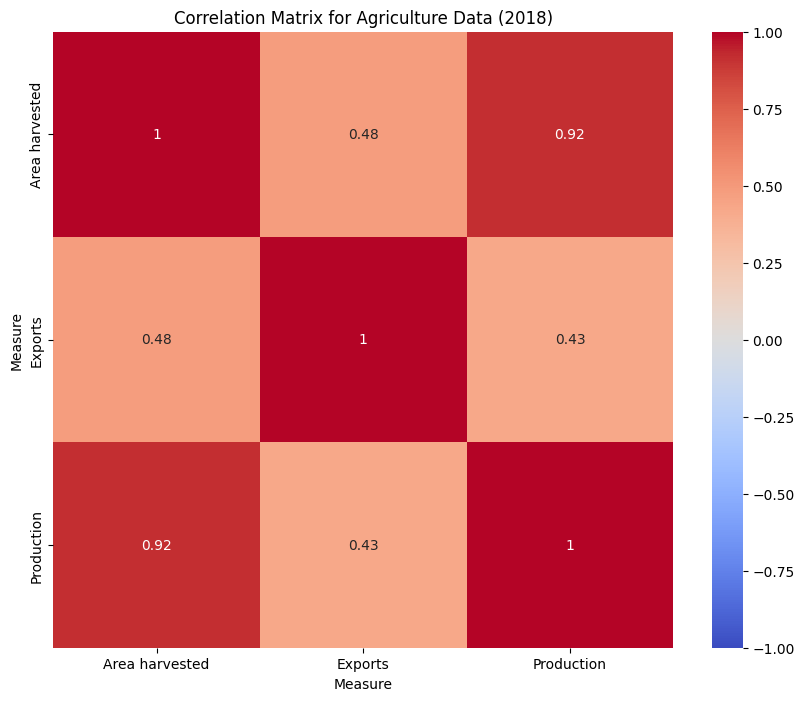

In [ ]:
#Pivot Table to get a Correlation Matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Agriculture_Data.csv')

df_2018 = df[df['Year'] == 2018]

pivoted_df = df_2018.pivot_table(index='Country', columns='Measure', values='Value')
print(pivoted_df.head())


corr_matrix_2018 = pivoted_df.corr()
print(corr_matrix_2018)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2018, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Agriculture Data (2018)')
plt.show()

After analyzing the data on wheat production per area harvested (per hectare), it was determined that Israel does not exhibit statistically significant differences compared to other nations. This means that when it comes to how much wheat they get out of each plot of land, Israel is holding its own on the global stage. This finding highlights how Israel's approach to wheat farming measures up against what's happening in other parts of the world.


That being said, I do believe that there are some variables not accounted for in the data. Israel is located in the desert, making water a precious commodity that often needs to be rationed intelligently. Additionally, due to this, an Israeli farmer invented drip irrigation, which makes water 15%-30% more effective on crops. Therefore, comparing countries that experience heavy rainfall, such as some listed in our data, to Israel may not fully capture the unique challenges and innovative agricultural practices Israel employs to achieve its agricultural outputs. This discrepancy could impact the accuracy of the comparisons and the interpretations of the significance tests.